In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.metrics import mean_squared_error

In [2]:
data = pd.read_csv('GOOG.csv')

In [3]:
data_copy = data.copy()

data_copy.dropna(inplace=True)

selected_features = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']
data_copy = data_copy[selected_features]

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data_copy)

In [4]:
df = pd.DataFrame(data)
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-08-19,2.490664,2.591785,2.390042,2.499133,2.499133,897427216
1,2004-08-20,2.515820,2.716817,2.503118,2.697639,2.697639,458857488
2,2004-08-23,2.758411,2.826406,2.716070,2.724787,2.724787,366857939
3,2004-08-24,2.770615,2.779581,2.579581,2.611960,2.611960,306396159
4,2004-08-25,2.614201,2.689918,2.587302,2.640104,2.640104,184645512


In [5]:
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


In [6]:
print("Dataset shape:", df.shape)
print("Columns:", df.columns)
print("Info:\n", df.info())
print("Summary statistics:\n", df.describe())

Dataset shape: (4858, 7)
Columns: Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4858 entries, 0 to 4857
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       4858 non-null   object 
 1   Open       4858 non-null   float64
 2   High       4858 non-null   float64
 3   Low        4858 non-null   float64
 4   Close      4858 non-null   float64
 5   Adj Close  4858 non-null   float64
 6   Volume     4858 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 265.8+ KB
Info:
 None
Summary statistics:
               Open         High          Low        Close    Adj Close  \
count  4858.000000  4858.000000  4858.000000  4858.000000  4858.000000   
mean     41.477174    41.917059    41.055491    41.494404    41.494404   
std      38.590695    39.031758    38.193016    38.618107    38.618107   
min       2.470490  

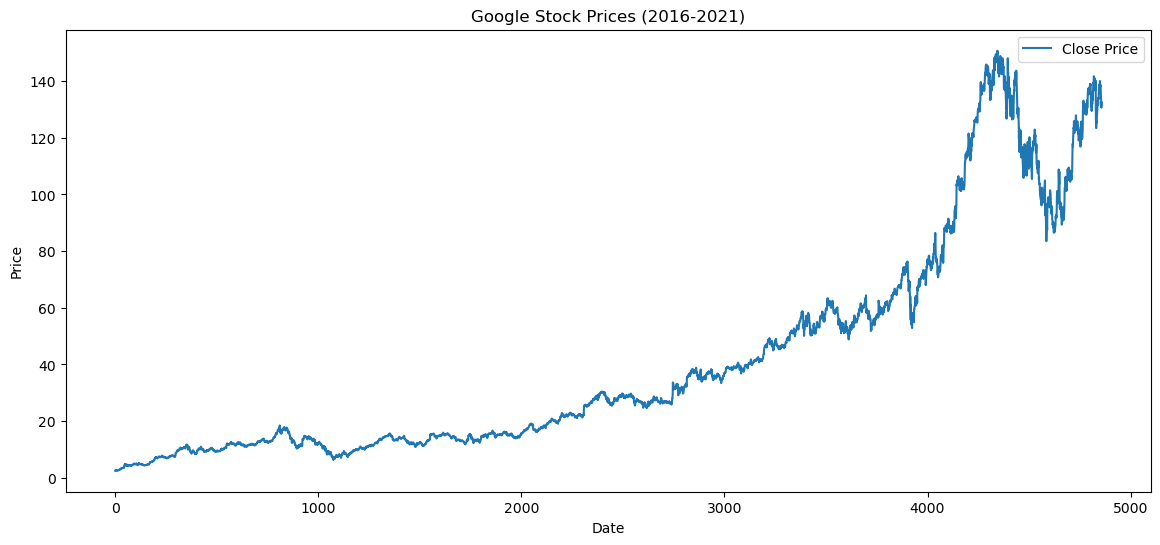

In [7]:
plt.figure(figsize=(14, 6))
plt.plot(data['Close'], label='Close Price')
plt.title('Google Stock Prices (2016-2021)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [8]:
df['Date'] = pd.to_datetime(df['Date'], utc=True)
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-08-19 00:00:00+00:00,2.490664,2.591785,2.390042,2.499133,2.499133,897427216
1,2004-08-20 00:00:00+00:00,2.515820,2.716817,2.503118,2.697639,2.697639,458857488
2,2004-08-23 00:00:00+00:00,2.758411,2.826406,2.716070,2.724787,2.724787,366857939
3,2004-08-24 00:00:00+00:00,2.770615,2.779581,2.579581,2.611960,2.611960,306396159
4,2004-08-25 00:00:00+00:00,2.614201,2.689918,2.587302,2.640104,2.640104,184645512


In [9]:
def prepare_data(data, time_steps):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:(i + time_steps)])
        y.append(data[i + time_steps])
    return np.array(X), np.array(y)

time_steps = 60  

X, y = prepare_data(scaled_data, time_steps)

In [10]:
split_ratio = 0.8  # Train-test split ratio
split_index = int(split_ratio * len(X))
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

In [11]:
model = Sequential([
    LSTM(units=100, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    Dropout(0.2),
    LSTM(units=100, return_sequences=True),
    Dropout(0.2),
    LSTM(units=100),
    Dropout(0.2),
    Dense(units=len(selected_features))
])

# Compile model
model.compile(optimizer='adam', loss='mean_squared_error',metrics=['accuracy'])

# Display model
print(model.summary())



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 100)           42800     
                                                                 
 dropout (Dropout)           (None, 60, 100)           0         
                                                                 
 lstm_1 (LSTM)               (None, 60, 100)           80400     
                                                                 
 dropout_1 (Dropout)         (None, 60, 100)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100)               80400     
                                                                 
 dropout_2 (Dropout)         (None, 100)               0         
                                                                 
 dense (Dense)               (None, 6)                

In [ ]:
epochs = 20 

history = model.fit(X_train, y_train, epochs=epochs, batch_size=32, verbose=1)

Epoch 1/20


120/120 [==============================] - 13s 78ms/step - loss: 0.0022 - accuracy: 0.4195
Epoch 2/20
120/120 [==============================] - 9s 74ms/step - loss: 0.0011 - accuracy: 0.4416
Epoch 3/20
120/120 [==============================] - 12s 98ms/step - loss: 9.2547e-04 - accuracy: 0.4536
Epoch 4/20
120/120 [==============================] - 12s 97ms/step - loss: 8.9224e-04 - accuracy: 0.4539
Epoch 5/20
120/120 [==============================] - 12s 103ms/step - loss: 8.2397e-04 - accuracy: 0.4640
Epoch 6/20
120/120 [==============================] - 12s 98ms/step - loss: 7.9657e-04 - accuracy: 0.4591
Epoch 7/20
120/120 [==============================] - 11s 93ms/step - loss: 7.6506e-04 - accuracy: 0.4578
Epoch 8/20
120/120 [==============================] - 11s 93ms/step - loss: 7.3659e-04 - accuracy: 0.4591
Epoch 9/20
120/120 [==============================] - 11s 93ms/step - loss: 7.4974e-04 - accuracy: 0.4518
Epoch 10/20
120/120 [==============================]

In [ ]:
loss = history.history['loss']

epochs = range(len(loss))

plt.plot(epochs, loss, 'r', label='Training loss')

plt.title('Training loss', size=15, weight='bold')
plt.legend(loc=0)
plt.figure()

plt.show()
#model evaluasi
train_loss = model.evaluate(X_train, y_train, verbose=0)
test_loss = model.evaluate(X_test, y_test, verbose=0)

print(f"Train Loss: {train_loss}")
print(f"Test Loss: {test_loss}")

In [ ]:
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)
y_test_inverse = scaler.inverse_transform(y_test)

# prediksi vs aktual
plt.figure(figsize=(10, 6))
plt.plot(predictions[:,3], label='Predicted Close Price', color='r')
plt.plot(y_test_inverse[:,3], label='Actual Close Price', color='b')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()